In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


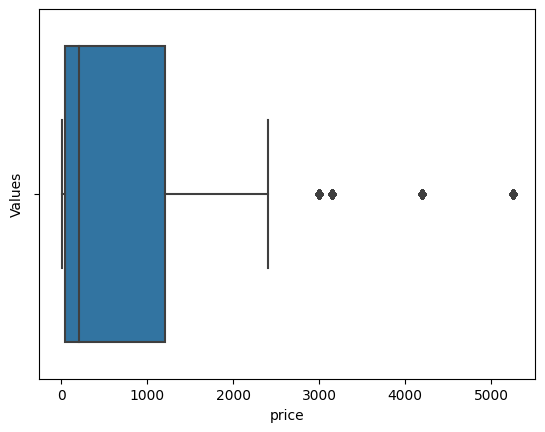

In [4]:
sns.boxplot(x='price',data=df)  
plt.ylabel("Values")

# Show the plot
plt.show()

In [5]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
df[df['price']>upper_bound]

2932.625


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
15,I688768,C362288,Male,24,Shoes,5,3000.85,Credit Card,7/11/2021,Viaport Outlet
23,I252275,C313348,Male,44,Technology,5,5250.00,Cash,26/10/2021,Kanyon
53,I160777,C626042,Female,43,Technology,4,4200.00,Cash,22/02/2022,Metrocity
69,I883721,C236859,Female,44,Technology,5,5250.00,Credit Card,19/11/2021,Mall of Istanbul
...,...,...,...,...,...,...,...,...,...,...
99332,I206967,C232954,Female,53,Shoes,5,3000.85,Credit Card,13/03/2022,Metrocity
99374,I221532,C956894,Male,36,Technology,3,3150.00,Credit Card,24/12/2021,Metropol AVM
99387,I429361,C258359,Male,33,Technology,3,3150.00,Credit Card,1/8/2022,Kanyon
99424,I549710,C541824,Female,34,Technology,3,3150.00,Cash,13/01/2021,Metrocity


 **Questions to answer**
* Are there a correlation between the age and how much they spend?
* Are there a correlation between the payment method and how much they spend?
* Are there a correlation between the payment method and age?
* what are the mall with most profit?
* The average purchase made in one day
* Predicting the probablities of different number of purcheses made in one day
* Are there is a relationship between the gender and the category
* Are there categories that is more trendy than other? does it change over the years?

#  Are there a correlation between the age and how much they spend?

no there is no correlation between the age and how much they spend

<Axes: >

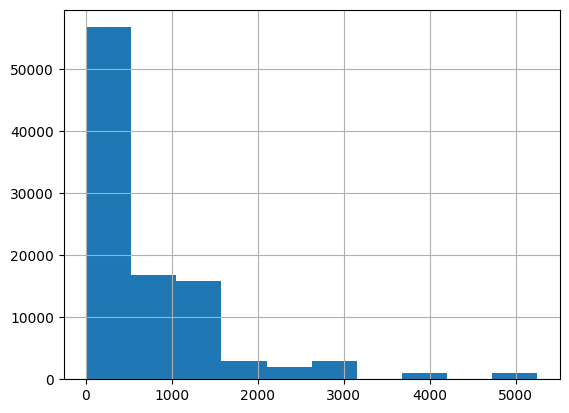

In [6]:
#the price feature is discretly distributed and rightly skewed
df['price'].hist()

<Axes: >

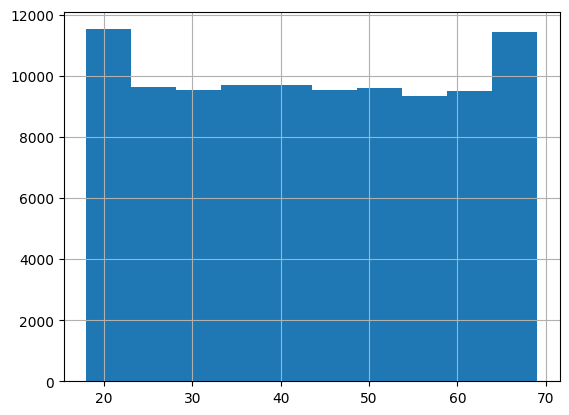

In [7]:
#the age feature is uniformally distributed
df['age'].hist()

<Axes: xlabel='age', ylabel='price'>

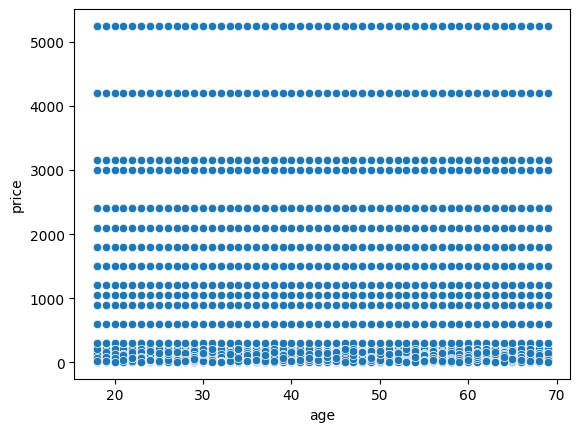

In [8]:
#the relationship between the age and the price are not linear by anymeans so we can't calculate the correlation 
sns.scatterplot(x='age',y='price',data=df)

In [9]:
df['log_price'] = np.log(df['price'] + 1)

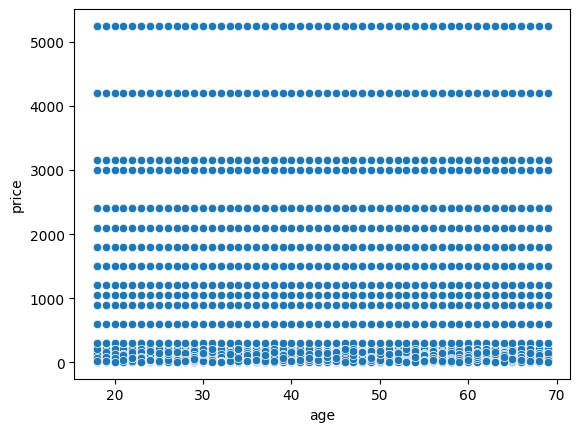

In [10]:
sns.scatterplot(x='age',y='price',data=df)
plt.show()

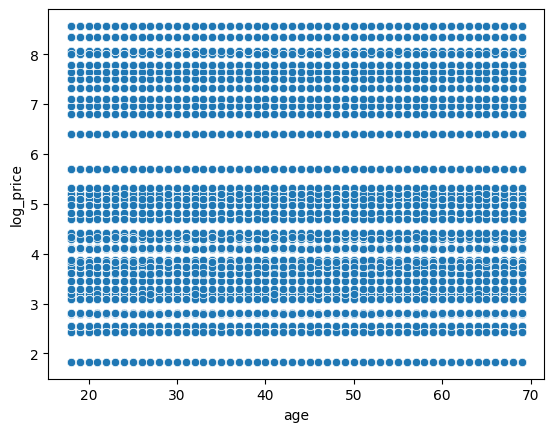

In [11]:
sns.scatterplot(x='age',y='log_price',data=df)
plt.show()

In [12]:
spearman_correlation, p_value = stats.spearmanr(df['age'], df['log_price'])

print(f"Spearman Correlation: {spearman_correlation}, P-value: {p_value}")

Spearman Correlation: 0.0006143368792337538, P-value: 0.8463796262344155


In [13]:
print(df['age'].min())

18


In [14]:
bin = np.linspace(df['age'].min(), df['age'].max(), 5 + 1)
print(bin.astype(int))

[18 28 38 48 58 69]


In [15]:
bins=[18, 28, 38 ,48, 58, 69]
labels = ['18-28', '28-38', '38-48', '48-58', '58-70']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age segment
grouped = df.groupby('age_group')

# Calculate spending statistics for each segment
spending_stats = grouped['log_price'].agg(['mean', 'median', 'sum'])

print(spending_stats)

               mean    median            sum
age_group                                   
18-28      5.380398  5.319590  103330.536130
28-38      5.374636  5.319590  103322.006667
38-48      5.398974  5.707376  103746.691218
48-58      5.374890  5.319590  102230.398635
58-70      5.382790  5.319590  112451.857103


In [16]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,log_price,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7.314153,28-38
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,7.496380,18-28
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,5.707376,18-28
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,8.006984,58-70
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,4.120662,48-58
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,4.088494,38-48
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,2.438863,18-28
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,2.438863,58-70
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,8.343078,48-58


#

In [17]:
df['total_price']=df['quantity']*df['price']

<Axes: >

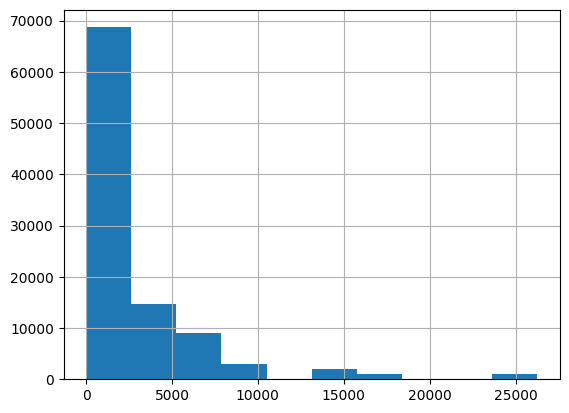

In [18]:
df['total_price'].hist()

<Axes: xlabel='age', ylabel='total_price'>

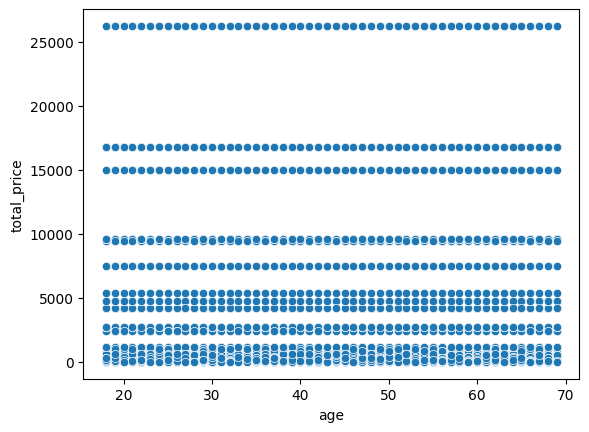

In [19]:
sns.scatterplot(x='age',y='total_price',data=df)

In [20]:
spending_stats = grouped['total_price'].agg(['mean', 'median', 'sum'])

print(spending_stats)

                  mean  median          sum
age_group                                  
18-28      2513.488426  600.17  48271545.23
28-38      2495.951142  600.17  47982164.76
38-48      2578.240598  600.17  49543471.34
48-58      2522.036719  600.17  47969138.40
58-70      2543.769780  600.17  53141894.47


# Are there a correlation between the payment method and how much they spend?
## NO

Axes(0.125,0.11;0.775x0.77)


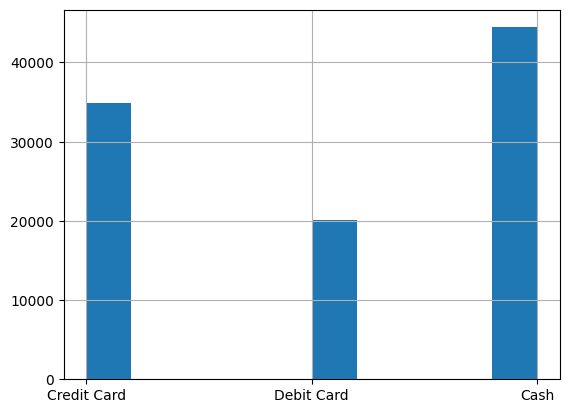

In [21]:
print(df['payment_method'].hist())

<Axes: xlabel='payment_method', ylabel='total_price'>

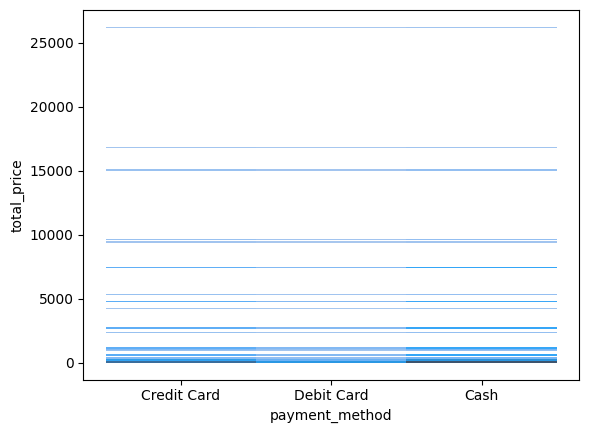

In [22]:
sns.histplot(x='payment_method',y='total_price',data=df)

<Axes: xlabel='age', ylabel='payment_method'>

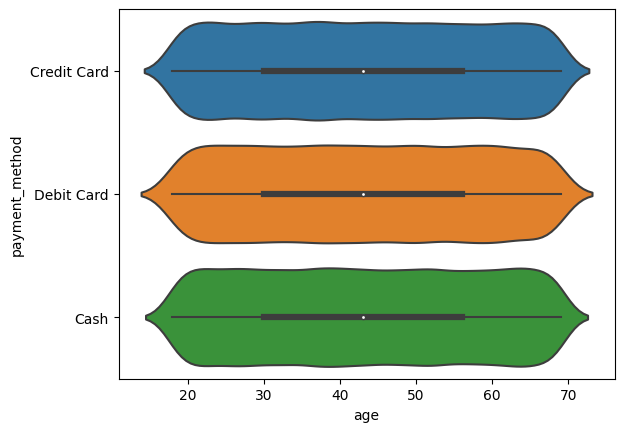

In [23]:
sns.violinplot(x='age',y='payment_method',data=df)

In [24]:
#top preforming malls:
df.groupby('shopping_mall')['total_price'].sum().sort_values(ascending=False)

shopping_mall
Mall of Istanbul     50872481.68
Kanyon               50554231.10
Metrocity            37302787.33
Metropol AVM         25379913.19
Istinye Park         24618827.68
Zorlu Center         12901053.82
Cevahir AVM          12645138.20
Viaport Outlet       12521339.72
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Name: total_price, dtype: float64

In [25]:
#Avergae purchases per day
df.groupby('invoice_date').count()['invoice_no'].mean()

124.7892095357591

In [26]:
df.groupby('invoice_date').count()['invoice_no'].max()
df.groupby('invoice_date').count()['invoice_no'].var()

119.27963216332604

<Axes: xlabel='invoice_no', ylabel='Count'>

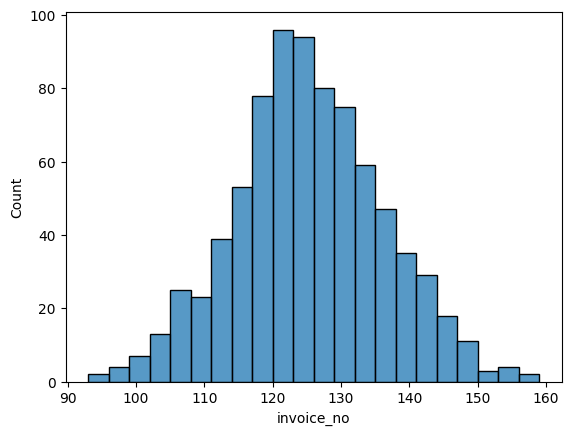

In [27]:
sns.histplot(df.groupby('invoice_date').count()['invoice_no'])

In [28]:
stats.poisson.cdf(110,124)

0.11120831089424892

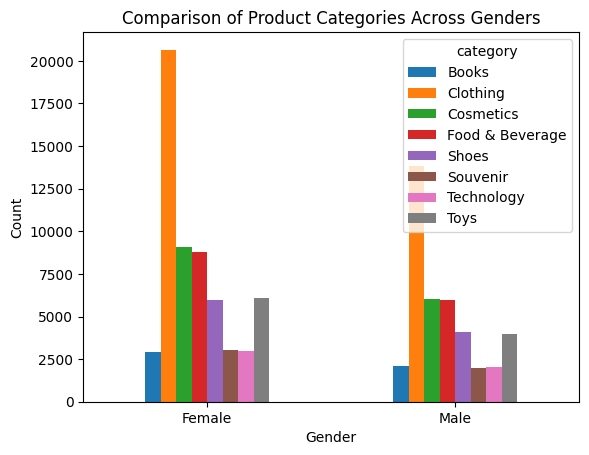

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupby(['gender', 'category']).size().unstack()
grouped_data.plot(kind='bar')

plt.title('Comparison of Product Categories Across Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


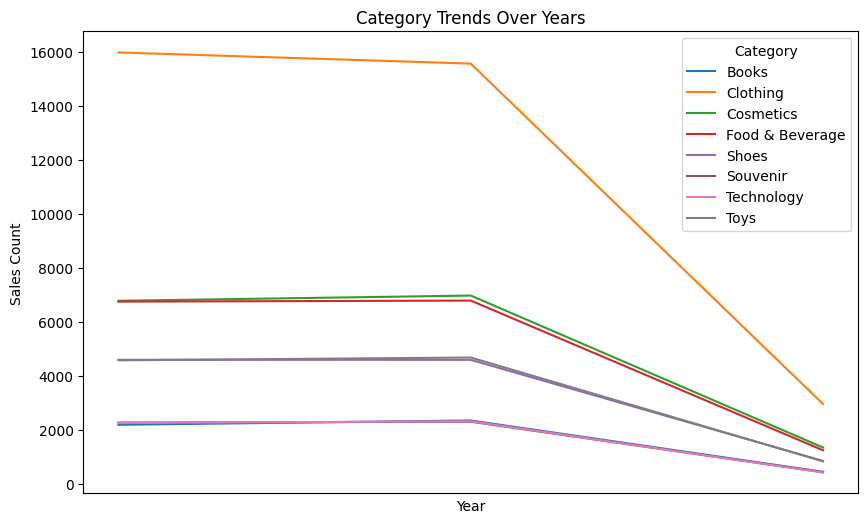

In [30]:
# Convert invoice_date from string to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'],format='%d/%m/%Y')

# Extract year from the date
df['year'] = df['invoice_date'].dt.year

# Group by year and category
trend_data = df.groupby(['year', 'category']).size().unstack()

# Plot the data
trend_data.plot(kind='line',figsize=(10, 6))
plt.xticks([]) 
plt.title('Category Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.legend(title='Category')
plt.show()